<a href="https://colab.research.google.com/github/chongmong/python/blob/main/%EB%84%A4%ED%8A%B8%EC%9B%8C%ED%81%AC%EC%8B%A4%EB%AC%B4_%EA%B8%B0%EB%A7%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#아파트 매매 실거래 현황

In [41]:
# 나눔 고딕 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [39]:
# 데이터 수집
import urllib.request
from bs4 import BeautifulSoup

data = 202212
gu_code = 41281

service_key = '8ii22PTHYjv2akWxcIrZA7zcHXFyTrWq153f7OQcBH%2BKEa6hTsH5Kq5Tx2BpmBwHQN%2BUnYqVpfcG6%2ByWkMHfSQ%3D%3D'

url = f'http://openapi.molit.go.kr:8081/OpenAPI_ToolInstallPackage/service/rest/RTMSOBJSvc/getRTMSDataSvcAptTrade?serviceKey={service_key}&LAWD_CD={gu_code}&DEAL_YMD={data}'

result = urllib.request.urlopen(url)
house = BeautifulSoup(result, 'lxml-xml')
te = house.find_all('item')

print(te)


[<item><거래금액>      22,000</거래금액><거래유형>중개거래</거래유형><건축년도>2003</건축년도><년>2022</년><법정동> 주교동</법정동><아파트>(608-3)</아파트><월>12</월><일>4</일><전용면적>58.46</전용면적><중개사소재지>경기 고양덕양구</중개사소재지><지번>608-3</지번><지역코드>41281</지역코드><층>2</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>, <item><거래금액>      11,000</거래금액><거래유형>직거래</거래유형><건축년도>1985</건축년도><년>2022</년><법정동> 주교동</법정동><아파트>우진(569-9)</아파트><월>12</월><일>11</일><전용면적>55.8</전용면적><중개사소재지> </중개사소재지><지번>569-9</지번><지역코드>41281</지역코드><층>1</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>, <item><거래금액>      48,000</거래금액><거래유형>직거래</거래유형><건축년도>2022</건축년도><년>2022</년><법정동> 주교동</법정동><아파트>경원아인스타워</아파트><월>12</월><일>19</일><전용면적>74.62</전용면적><중개사소재지> </중개사소재지><지번>584-3</지번><지역코드>41281</지역코드><층>12</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>, <item><거래금액>      28,500</거래금액><거래유형>중개거래</거래유형><건축년도>1999</건축년도><년>2022</년><법정동> 주교동</법정동><아파트>서초</아파트><월>12</월><일>20</일><전용면적>84.96</전용면적><중개사소재지>경기 고양덕양구</중개사소재지><지번>313-1</지번><지역코드>41281</지역코드><층>5</층><해제사유발생일> </해제사유발생일><해제여부> </해제여부></item>, <item><

In [40]:
# 데이터 정리
datas = []  #1

for i in range(len(te)):  
    deposit = te[i].거래금액.string.strip()  
    rent_fee = te[i].거래유형.string.strip()
    built_yr = te[i].건축년도.string.strip()
    nuem_yr = te[i].년.string.strip()
    dong_name = te[i].법정동.string.strip()
    apt_name = te[i].아파트.string.strip()
    month_tm = te[i].월.string.strip()
    day_tm = te[i].일.string.strip()
    size = te[i].전용면적.string.strip()
    spot = te[i].중개사소재지.string.strip()
    large = te[i].지번.string.strip()
    gu_code = te[i].지역코드.string.strip()
    floor_code = te[i].층.string.strip()
    
    data = [deposit, rent_fee, built_yr, dong_name, apt_name, size, spot, gu_code]  
    datas.append(data)  

print(datas)

[['22,000', '중개거래', '2003', '주교동', '(608-3)', '58.46', '경기 고양덕양구', '41281'], ['11,000', '직거래', '1985', '주교동', '우진(569-9)', '55.8', '', '41281'], ['48,000', '직거래', '2022', '주교동', '경원아인스타워', '74.62', '', '41281'], ['28,500', '중개거래', '1999', '주교동', '서초', '84.96', '경기 고양덕양구', '41281'], ['26,000', '중개거래', '2017', '주교동', '스카이팰리스', '69.93', '경기 고양덕양구', '41281'], ['64,000', '중개거래', '2012', '원흥동', '삼송리슈빌센트럴파크', '84.9984', '경기 고양덕양구', '41281'], ['67,500', '중개거래', '2020', '원흥동', '삼송2차원흥역동원로얄듀크비스타', '84.9867', '경기 고양덕양구', '41281'], ['67,500', '중개거래', '2020', '원흥동', '삼송2차원흥역동원로얄듀크비스타', '84.9867', '경기 고양덕양구', '41281'], ['53,500', '중개거래', '2013', '도내동', '도래울파크뷰', '74.97', '경기 고양덕양구', '41281'], ['59,500', '중개거래', '2017', '도내동', '원흥호반베르디움더퍼스트5단지', '84.9491', '경기 고양덕양구', '41281'], ['73,000', '중개거래', '2018', '도내동', '고양원흥동일스위트', '84.9832', '경기 고양덕양구', '41281'], ['62,200', '중개거래', '2009', '성사동', '삼성래미안', '84.99', '경기 고양덕양구', '41281'], ['45,000', '직거래', '1993', '성사동', '신원당(태영6)', '84.88', '', '41281'], ['26

In [44]:
# 데이터프레임 생성
import pandas as pd
df = pd.DataFrame(datas, columns=['deposit', 'rent_fee', 'built_yr', 'dong_name', 'apt_name',
                                  'size', 'spot', 'gu_code'])

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   deposit    69 non-null     object
 1   rent_fee   69 non-null     object
 2   built_yr   69 non-null     object
 3   dong_name  69 non-null     object
 4   apt_name   69 non-null     object
 5   size       69 non-null     object
 6   spot       69 non-null     object
 7   gu_code    69 non-null     object
dtypes: object(8)
memory usage: 4.4+ KB


In [46]:
# 데이터 전처리
df['deposit'] = df['deposit'].str.replace(',', '').astype(int)
df['built_yr'] = df['built_yr'].astype(int)
df['gu_code'] = df['gu_code'].astype(int)
df['size'] = df['size'].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   deposit    69 non-null     int64  
 1   rent_fee   69 non-null     object 
 2   built_yr   69 non-null     int64  
 3   dong_name  69 non-null     object 
 4   apt_name   69 non-null     object 
 5   size       69 non-null     float64
 6   spot       69 non-null     object 
 7   gu_code    69 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.4+ KB


In [50]:
# 데이터 분석
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rc('font', family='NanumGothic', size=20)

# 각 동 거래금액의 평균
mia_ren = df[df["dong_name"]=="행신동"]["deposit"].mean()
suyu_ren = df[df["dong_name"]=="주교동"]["deposit"].mean()
ui_ren = df[df["dong_name"]=="고양동"]["deposit"].mean()
zi_ren = df[df["dong_name"]=="화정동"]["deposit"].mean()
gi_ren = df[df["dong_name"]=="덕은동"]["deposit"].mean()


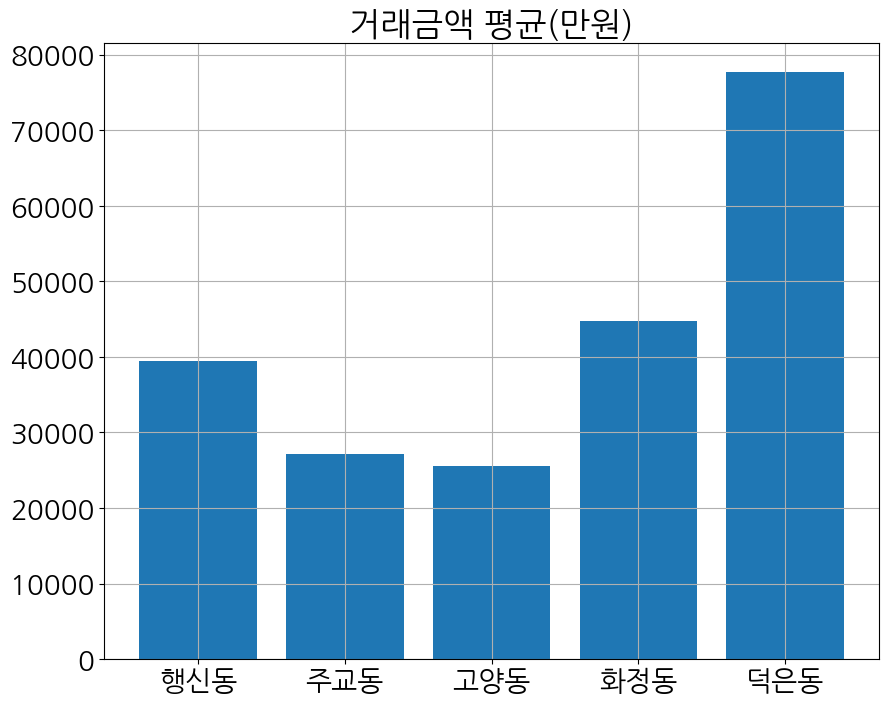

In [51]:
# 동별 평균 거래금액 막대그래프
plt.figure(figsize=(10,8))
plt.bar(["행신동", "주교동", "고양동", "화정동", "덕은동"], [mia_ren, suyu_ren, ui_ren, zi_ren, gi_ren])
plt.title("거래금액 평균(만원)")
plt.grid() 
plt.show() 

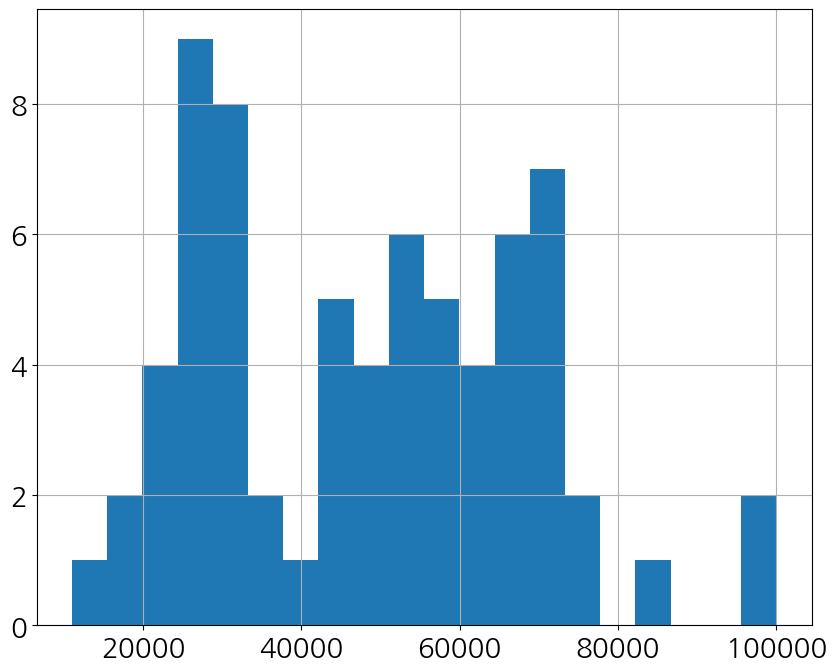

In [55]:
# 거래금액 히스토그램 
plt.figure(figsize=(10,8))
plt.hist(df['deposit'], bins=20)
plt.grid()
plt.show()

In [52]:
# 거래금액 수치 데이터
df["deposit"].describe()

count        69.000000
mean      48338.405797
std       20235.692376
min       11000.000000
25%       29900.000000
50%       50000.000000
75%       66000.000000
max      100000.000000
Name: deposit, dtype: float64